100%|██████████| 100/100 [00:00<00:00, 483.23it/s]


Accuracy: 72.0
Mean episode length: 75.63
Last reward processor:
Estimated confusion matrix:


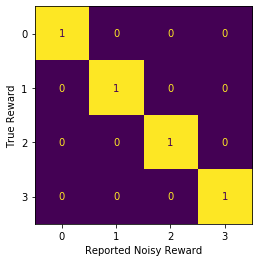

Reward sets:
(0, 0): [-2, -2, -3, -3, -3, -3]
(0, 1): [-3, -3, -1]
(0, 2): [-1, 0, 0, -3, -1, 0, -2, 0, -3, -1, -2, -2, -3, -1]
(0, 3): [0, -1, -1, 0, -1, -1, 0, 0, -1, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, -1, -2, 0, 0, 0, 0, 0, 0, 0, 0, -2, -1, 0, 0, -1, 0, 0, -2]
(0, 4): [-2]
(0, 5): [-3, -3, -3]
(0, 6): [-3, -3, -3]
Reward set counts:
Key (0, 0): 6 items
Key (0, 1): 3 items
Key (0, 2): 14 items
Key (0, 3): 45 items
Key (0, 4): 1 items
Key (0, 5): 3 items
Key (0, 6): 3 items


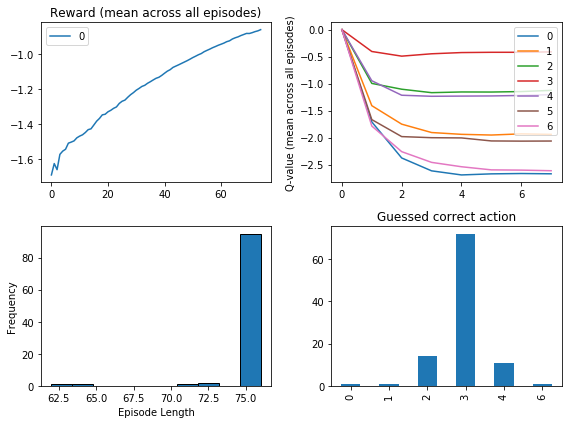

array([-2.672181, -1.941559, -1.125564, -0.411342, -1.204027, -2.064609,
       -2.615192])

In [1]:
import utils
from utils import *
from thompson_sampling_agent import ThompsonSamplingAgentTemporaryWrapper

params_new = {
    'max_steps': 75,
    'correct_action': 3,
    # # Runner parameters
    # 'max_steps': 1000,
    'num_episodes': 100,
    # 'convergence_consecutive_limit': 30,
    #
    'agent': ThompsonSamplingAgentTemporaryWrapper,    
    }

params = default_params() | params_new
plot_mean_q_values(params=params)

# Mean reward might awkwardly drop, because most of the episodes end early

Let's remove the convergence criteria and have a look at which one converges faster,
visuallly

100%|██████████| 100/100 [00:00<00:00, 192.29it/s]


Accuracy: 73.0
Mean episode length: 76.0


100%|██████████| 100/100 [00:00<00:00, 280.92it/s]


Accuracy: 66.0
Mean episode length: 76.0


100%|██████████| 100/100 [00:00<00:00, 485.39it/s]

Accuracy: 66.0
Mean episode length: 76.0


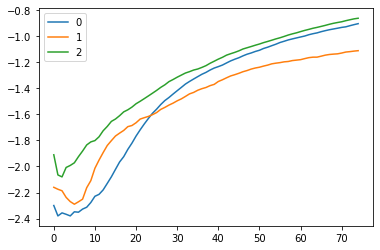

In [12]:
rewards = []

params_new = {
    # # Runner parameters
    'max_steps': 75,
    'num_episodes': 100,
    'convergence_count_start': 2000,
    # 'convergence_consecutive_limit': 15,    
    }

params = default_params() | params_new

from ucbq_agent_stateless import UCBQAgent

params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
params = params | optimized_params
params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
params['surrogate'] = False
params['agent'] = ThompsonSamplingAgentTemporaryWrapper
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)


# Beware, VS Code variable inspector can show wrong Size value

# Apply get_mean_rewards_across_episodes to each element in rewards
mean_rewards = [get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards]

pd.DataFrame(mean_rewards).T.plot()

Thompson sampling converges faster than the unoptimized version. The optimized version is bad.

Something might be wrong with the previous optimized params. We rand the optimization again,
and the learning curve greatly improved:

100%|██████████| 100/100 [00:00<00:00, 381.83it/s]


Accuracy: 80.0
Mean episode length: 76.0


100%|██████████| 100/100 [00:00<00:00, 465.75it/s]


Accuracy: 60.0
Mean episode length: 76.0


100%|██████████| 100/100 [00:00<00:00, 505.33it/s]


Accuracy: 94.0
Mean episode length: 76.0


100%|██████████| 100/100 [00:00<00:00, 734.58it/s]

Accuracy: 82.0
Mean episode length: 76.0


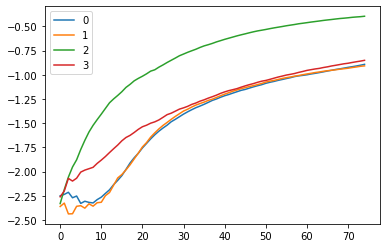

In [15]:
rewards = []

params_new = {
    # # Runner parameters
    'max_steps': 75,
    'num_episodes': 100,
    'convergence_count_start': 2000,
    # 'convergence_consecutive_limit': 15,    
    }

params = default_params() | params_new

from ucbq_agent_stateless import UCBQAgent

params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params['surrogate'] = True
params['agent'] = UCBQAgent
params['stationary_noise'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
optimized_params = {'target': 94.69999999999999, 'params': {'alpha': 0.44789352617590517, 'alpha_decay': 908.6869075900024, 'alpha_min': 0.2936141483736795, 'epsilon': 0.28777533858634874, 'epsilon_decay': 130.8985435461594, 'epsilon_min': 0.019366957870297075, 'gamma': 0.678835532939891, 'surrogate_c_interval': 26.183745804007025, 'surrogate_c_interval_min': 32.60005246529492}}
params = params | optimized_params ['params']
params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
params['surrogate'] = False
params['agent'] = ThompsonSamplingAgentTemporaryWrapper
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)


# Beware, VS Code variable inspector can show wrong Size value

# Apply get_mean_rewards_across_episodes to each element in rewards
mean_rewards = [get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards]

pd.DataFrame(mean_rewards).T.plot()

In the long term, the non-optimized version an Thompson sampling seem to be
outperforming. This makes sense, cause the optimized version was optimized for
an episode length of 75.

100%|██████████| 100/100 [00:09<00:00, 10.19it/s]


Accuracy: 100.0
Mean episode length: 2016.25


100%|██████████| 100/100 [00:05<00:00, 18.12it/s]


Accuracy: 100.0
Mean episode length: 2038.61


100%|██████████| 100/100 [00:04<00:00, 21.02it/s]


Accuracy: 97.0
Mean episode length: 2021.2


100%|██████████| 100/100 [00:04<00:00, 21.18it/s]


Accuracy: 100.0
Mean episode length: 2020.35


100%|██████████| 100/100 [00:02<00:00, 33.74it/s]


Accuracy: 100.0
Mean episode length: 2016.65


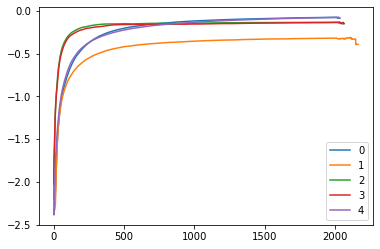

In [18]:
rewards = []

params_new = {
    # # Runner parameters
    'max_steps': 10000,
    'num_episodes': 100,
    'convergence_count_start': 2000,
    # 'convergence_consecutive_limit': 15,    
    }

params = default_params() | params_new

from ucbq_agent_stateless import UCBQAgent

params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params['surrogate'] = True
params['agent'] = UCBQAgent
params['stationary_noise'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
optimized_params = {'target': 94.69999999999999, 'params': {'alpha': 0.44789352617590517, 'alpha_decay': 908.6869075900024, 'alpha_min': 0.2936141483736795, 'epsilon': 0.28777533858634874, 'epsilon_decay': 130.8985435461594, 'epsilon_min': 0.019366957870297075, 'gamma': 0.678835532939891, 'surrogate_c_interval': 26.183745804007025, 'surrogate_c_interval_min': 32.60005246529492}}
params = params | optimized_params ['params']
params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
optimized_params = {'target': 94.69999999999999, 'params': {'alpha': 0.44789352617590517, 'alpha_decay': 908.6869075900024, 'alpha_min': 0.2936141483736795, 'epsilon': 0.28777533858634874, 'epsilon_decay': 130.8985435461594, 'epsilon_min': 0.019366957870297075, 'gamma': 0.678835532939891, 'surrogate_c_interval': 26.183745804007025, 'surrogate_c_interval_min': 32.60005246529492}}
params = params | optimized_params ['params']
params['surrogate'] = True
params['agent'] = UCBQAgent
params['stationary_noise'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

params = default_params() | params_new
params['surrogate'] = False
params['agent'] = ThompsonSamplingAgentTemporaryWrapper
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)


# Beware, VS Code variable inspector can show wrong Size value

# Apply get_mean_rewards_across_episodes to each element in rewards
mean_rewards = [get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards]

pd.DataFrame(mean_rewards).T.plot()